In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

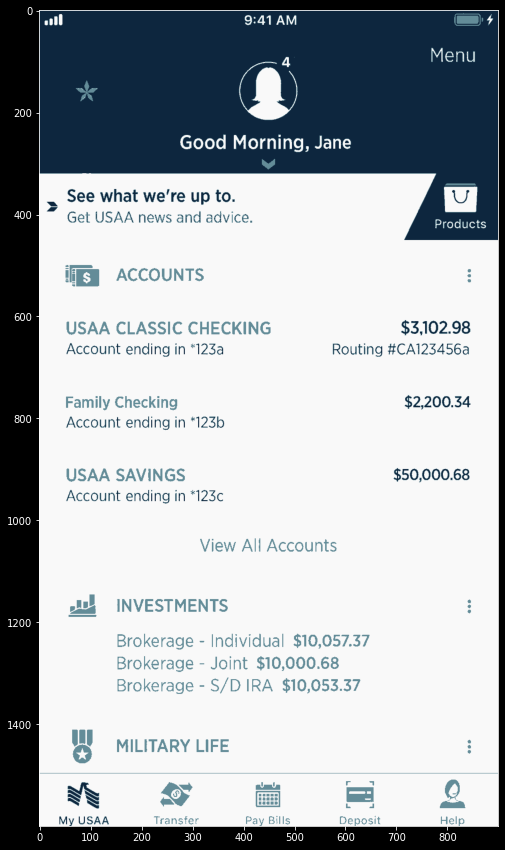

In [5]:
path = '../screens/01_bank-app.jpg'
img = cv2.imread(path)

img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
twoDimage = img.reshape((-1,3))
twoDimage = np.float32(twoDimage)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3
attempts=10

ret,label,center=cv2.kmeans(twoDimage,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))

plt.figure(figsize = (15, 15))
plt.imshow(result_image)

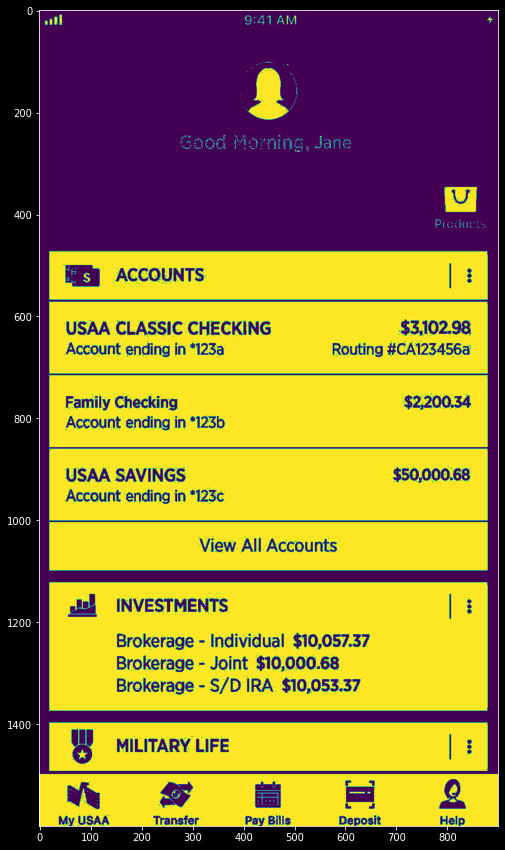

In [19]:
# convert the image to grayscale format
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# apply binary thresholding
ret, thresh = cv2.threshold(img_gray, 250, 255, cv2.THRESH_BINARY)
# visualize the binary image
plt.figure(figsize = (15, 15))
plt.imshow(thresh)

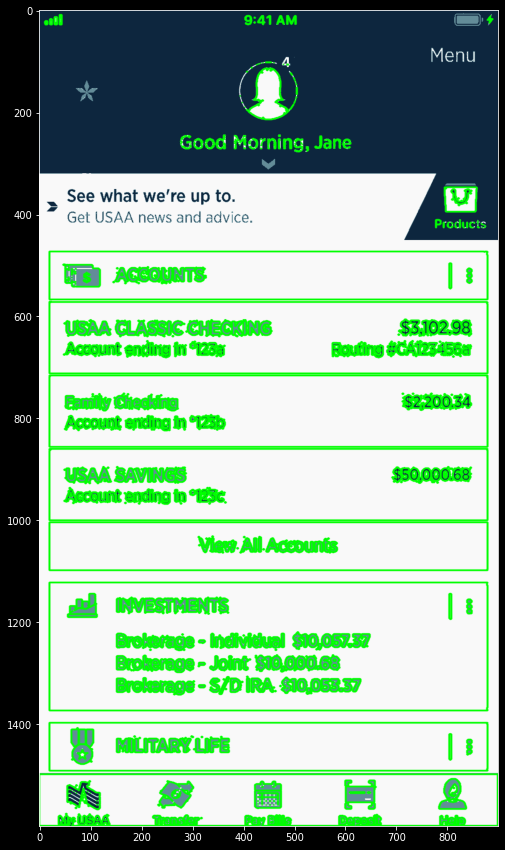

In [20]:
# detect the contours on the binary image using cv2.CHAIN_APPROX_NONE
contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
# draw contours on the original image
image_copy = result_image.copy()
cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
# see the results
plt.figure(figsize = (15, 15))
plt.imshow(image_copy)